# 🚜 Predicción del Precio de Venta de Bulldozers utilizando Machine Learning

En este cuaderno, realizaremos un ejemplo de proyecto de aprendizaje automático con el objetivo de predecir el precio de venta de bulldozers.

### 1. Definición del Problema
¿Cuán bien podemos predecir el precio de venta futuro de un bulldozer, dados sus características y ejemplos previos de cuánto se han vendido bulldozers similares?

### 2. Datos
Los datos se descargan de la competición de Kaggle **Bluebook for Bulldozers**: [Bluebook for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/data)

Hay 3 conjuntos de datos principales:
- **Train.csv**: Es el conjunto de entrenamiento, que contiene datos hasta finales de 2011.
- **Valid.csv**: Es el conjunto de validación, que contiene datos del 1 de enero de 2012 al 30 de abril de 2012. Se utiliza para realizar predicciones durante la mayor parte de la competencia. Tu puntuación en este conjunto se utiliza para generar el ranking público.
- **Test.csv**: Es el conjunto de prueba, que no se liberará hasta la última semana de la competencia. Contiene datos del 1 de mayo de 2012 a noviembre de 2012. Tu puntuación en este conjunto determina tu clasificación final en la competencia.

### 3. Evaluación
La métrica de evaluación para esta competición es el **RMSLE** (error logarítmico cuadrático medio de la raíz) entre los precios reales y los predichos en las subastas.

Para más información sobre la evaluación del proyecto, revisa: [Evaluación Bluebook for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation)

**Nota**: El objetivo de la mayoría de las métricas de evaluación de regresión es minimizar el error. Por ejemplo, nuestro objetivo en este proyecto será construir un modelo de aprendizaje automático que minimice el RMSLE.

### 4. Características
Kaggle proporciona un diccionario de datos que detalla todas las características del conjunto de datos. Puedes consultar este diccionario de datos en Google Sheets: [Diccionario de Datos](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import sys
import os

# Agregar la carpeta 'src' al path de búsqueda de Python
sys.path.append(os.path.abspath('../../scripts'))

# Importar funciones desde utils.py
from utils import (
    plot_categorical_grid
)

In [2]:
# Import training and validation sets
df = pd.read_csv("../../data/raw/scikit-learn-data/bulldozer-price-prediction/TrainAndValid.csv",
                 low_memory=False)
df.shape

(412698, 53)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Valores faltantes
missing_values = df.isnull().sum()
missing_percentage = np.round((missing_values / len(df)) * 100, 2)
missing_summary = pd.DataFrame({"missing_values": missing_values, "percentage": missing_percentage})
print(missing_summary.sort_values(by="missing_values", ascending=False))

                          missing_values  percentage
Engine_Horsepower                 386715       93.70
Pushblock                         386715       93.70
Enclosure_Type                    386715       93.70
Blade_Width                       386715       93.70
Blade_Extension                   386715       93.70
Tip_Control                       386715       93.70
Scarifier                         386704       93.70
Grouser_Tracks                    367823       89.13
Hydraulics_Flow                   367823       89.13
Coupler_System                    367724       89.10
fiModelSeries                     354031       85.78
Steering_Controls                 341176       82.67
Differential_Type                 341134       82.66
UsageBand                         339028       82.15
fiModelDescriptor                 337882       81.87
Backhoe_Mounting                  331986       80.44
Stick                             331602       80.35
Turbocharged                      331602      

In [5]:
# Comprobar si hay registros duplicados
print(f'Duplicados: {df.duplicated().sum()}')

Duplicados: 0


In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [7]:
# Aplicar el theme por defecto
sns.set_theme()

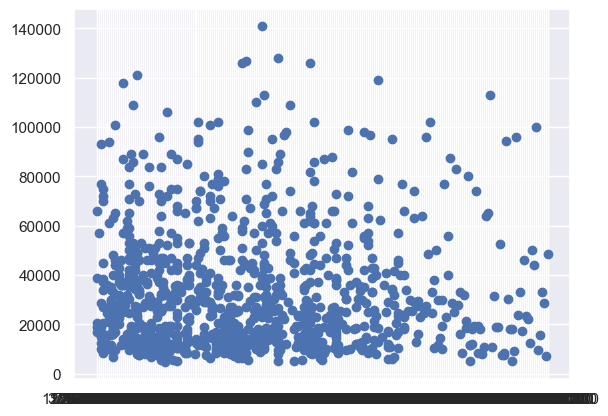

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [9]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [10]:
df.saledate.dtype

dtype('O')

#### Análisis Univariado

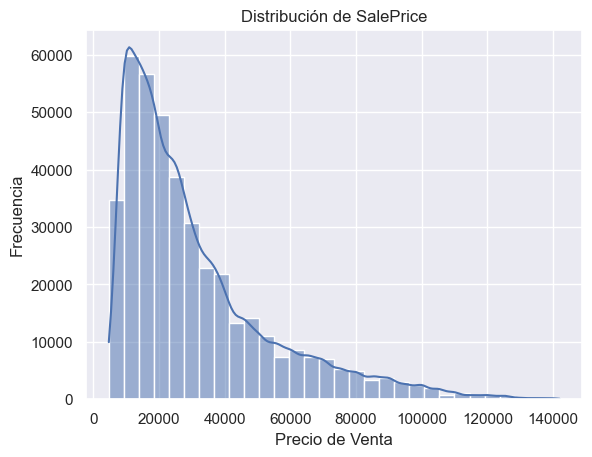

In [11]:
# Variable objetivo
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribución de SalePrice")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

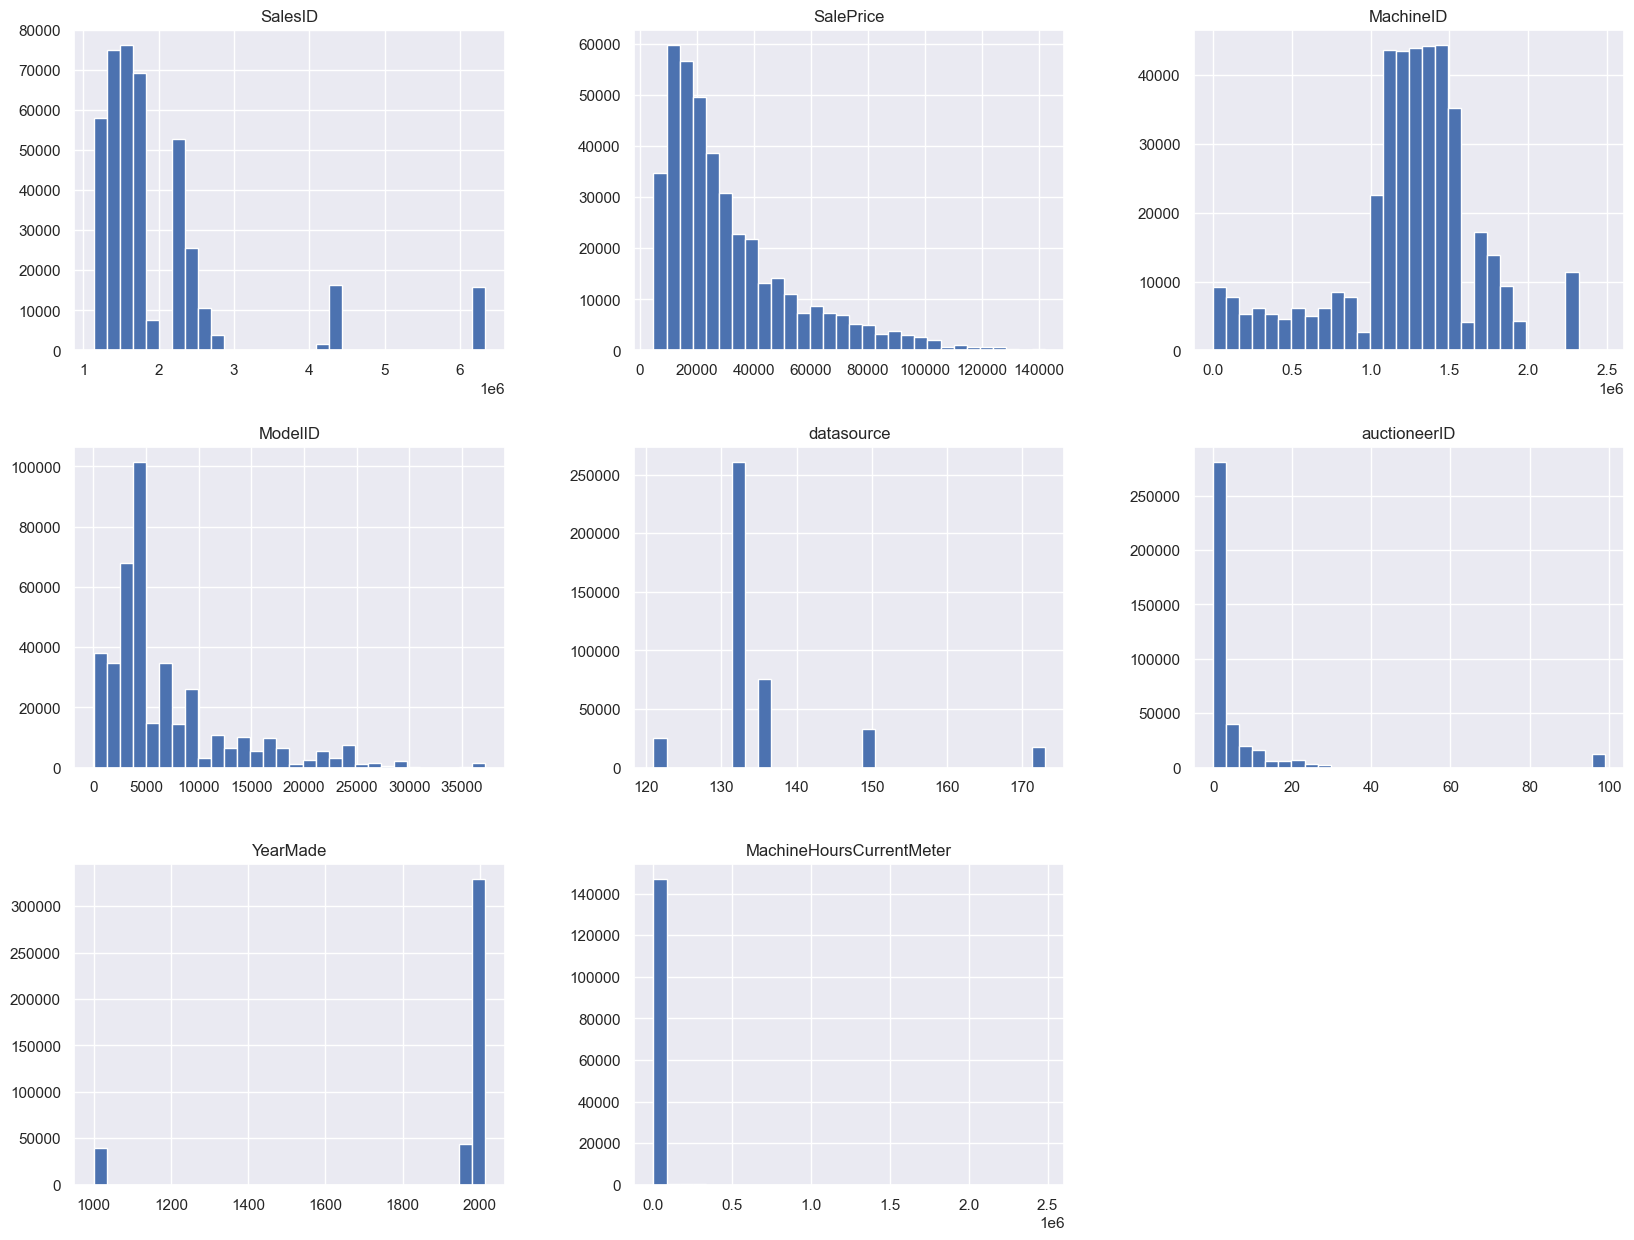

In [12]:
# Distribuciones de variables numéricas
df.hist(bins=30, figsize=(20, 15))
plt.show()

### Análisis de fechas  

Cuando trabajamos con datos de series temporales, queremos enriquecer el componente de tiempo y fecha tanto como sea posible.  

Podemos hacer eso indicando a pandas cuál de nuestras columnas contiene fechas utilizando el parámetro `parse_dates`.

In [13]:
# Importar datos nuevamente, pero esta vez analizando fechas
df = pd.read_csv("../../data/raw/scikit-learn-data/bulldozer-price-prediction/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

El parámetro `parse_dates` en `pd.read_csv` le dice a Pandas que debe convertir automáticamente las columnas indicadas en objetos de tipo **datetime** mientras carga el archivo. Esto es útil para trabajar con columnas de fechas sin necesidad de convertirlas manualmente después de cargar los datos.

Si las fechas no están en un formato estándar, Pandas podría lanzar un error, pero en general, funciona para formatos comunes como `YYYY-MM-DD` o `DD/MM/YYYY`.

In [14]:
df.saledate.dtype

dtype('<M8[ns]')

Cuando Pandas convierte una columna en un objeto de tipo `datetime`, internamente utiliza un formato llamado **datetime64**, que es eficiente para manejar fechas en operaciones numéricas o de comparación.

In [15]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

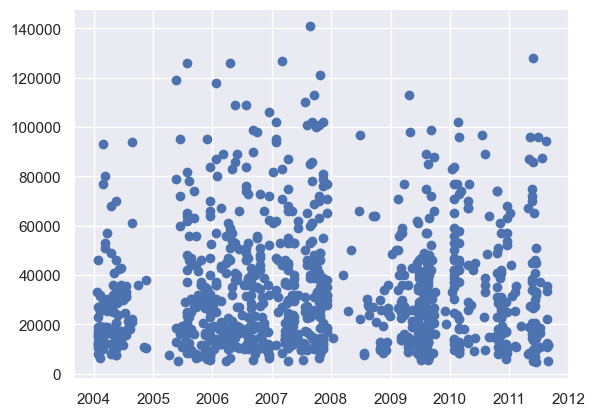

In [16]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [19]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Ordenar DataFrame por saledate¶  

Al trabajar con datos de series temporales, es una buena idea ordenarlos por fecha.

In [20]:
# Ordenar el DataFrame por fecha
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Hacer una copia del DataFrame original

Hacemos una copia del DataFrame original para que cuando manipulemos la copia, aún tengamos nuestros datos originales.

In [21]:
# Haz una copia del DataFrame original para realizar ediciones.
df_tmp = df.copy()

### Agregar parámetros de fecha y hora para la columna `saledate`

In [22]:
df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [23]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [24]:
df_tmp[:1].saledate.dt.month

205615    1
Name: saledate, dtype: int32

In [25]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [26]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [27]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [28]:
# Ahora que hemos enriquecido nuestro DataFrame con características de fecha y hora, podemos eliminar 'saledate'.
df_tmp.drop("saledate", axis=1, inplace=True)

In [29]:
# Verifica los valores de diferentes columnas
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [30]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [31]:
len(df_tmp)

412698

## 5. Modelado  

Hemos hecho suficiente EDA (siempre podríamos hacer más), pero empecemos a hacer un EDA impulsado por modelos.

In [32]:
# Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"]) # Value Error: could not convert string to float: 'Low'

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [34]:
df_tmp["UsageBand"].dtype

dtype('O')

In [35]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convertir cadena en categorías

Una forma en que podemos convertir todos nuestros datos en números es transformándolos en categorías de pandas.

Podemos consultar los diferentes tipos de datos compatibles con pandas aquí: 
https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html

In [36]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [37]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

> 🔗 https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html

In [38]:
# Encontrar las columnas que contengan strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [39]:
# Identificar columnas que contienen strings válidos
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):  # Identifica columnas tipo object
        if content.dropna().apply(lambda x: isinstance(x, str)).all():  # Verifica que todo sea string
            print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [40]:
# Esto convertirá todos los valores de cadena en valores de categoría.
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [41]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

**`pd.api.types.is_string_dtype`** solo detecta columnas que tienen valores exclusivamente de tipo string, lo cual excluye columnas con `NaN` o datos mixtos.

Algunas columnas no se convierten a `category` si tienen:
   - Datos nulos (`NaN`).
   - Datos mixtos (e.g., strings y números).

Para garantizar conversiones consistentes:
   - Reemplaza `NaN` con un valor explícito antes de convertir.
   - Verifica manualmente que las columnas de tipo `object` contengan únicamente cadenas antes de aplicar `astype("category")`.

Lo veremos a continuación.

In [42]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [43]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Gracias a las categorías de pandas, ahora tenemos una forma de acceder a todos nuestros datos en forma de números.

Pero aún tenemos un montón de datos faltantes...

In [44]:
# Revisar datos faltantes
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Guardar los datos procesados

In [45]:
# Export current tmp dataframe
df_tmp.to_csv("../../data/processed/bluebook-for-bulldozers/train_tmp.csv",
              index=False)

In [46]:
# Import preprocessed data
df_tmp = pd.read_csv("../../data/processed/bluebook-for-bulldozers/train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [47]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Rellenar valores faltantes

### Rellenar valores faltantes numéricos primero

In [48]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [49]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [50]:
# Ver cuántas columnas numéricas tienen valores faltantes
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [51]:
# Rellenar las filas numéricas con la mediana
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Añadir una columna binaria que nos diga si faltaban datos o no
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Rellenar los valores numéricos faltantes con la mediana
            df_tmp[label] = content.fillna(content.median())

In [52]:
# Demostrar cómo la mediana es más robusta que la media
hundreds = np.full((1000,), 100) # genera un array de tamaño 1000 donde todos los valores son 100
hundreds_billion = np.append(hundreds, 1000000000) # agrega el valor 1000000000 al final del array hundreds
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

**La mediana es más robusta que la media frente a valores extremos (outliers).** En este ejemplo, el outlier (el valor de `1000000000`) altera significativamente la media, pero no afecta a la mediana. Esto demuestra por qué la **mediana es preferible** en análisis donde los datos contienen **valores atípicos.**

In [53]:
# Comprobar si hay valores numéricos nulos
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [54]:
# Comprobar cuántos ejemplos faltaban
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [55]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Llenar y convertir variables categóricas en números

In [56]:
# Comprobar si hay columnas que no sean numéricas
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [57]:
pd.Categorical(df_tmp["UsageBand"]).codes  # antes de la conversión

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [58]:
# Convertir variables categóricas en números y completar los faltantes
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Agregar una columna binaria para indicar si a la muestra le faltaba un valor
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Convierte categorías en números y suma +1
        df_tmp[label] = pd.Categorical(content).codes+1

> 🔗 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html

In [59]:
pd.Categorical(df_tmp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

Al sumar `+1`, evitamos que los valores faltantes (`NaN`) queden representados como `-1`. En lugar de eso:

* Los valores normales de las categorías empiezan desde `1`.
* Los valores faltantes (`NaN`) se representan como `0`.

In [60]:
pd.Categorical(df_tmp["UsageBand"]).codes  # después de la conversión

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [61]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [62]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [63]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Ahora que todos los datos son numéricos y que a nuestro dataset no le faltan valores, deberíamos poder construir un modelo de aprendizaje automático.

In [64]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [65]:
len(df_tmp)

412698

In [66]:
%%time
# Instanciar el modelo
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Entrenar el modelo
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 8min 26s, sys: 1.95 s, total: 8min 28s
Wall time: 41.3 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [67]:
# Puntuación del model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Pregunta:** ¿Por qué la métrica anterior no se sostiene? (¿Por qué la métrica no es confiable?)

La métrica obtenida (`model.score`) en este caso es **demasiado alta y no es confiable**, principalmente porque hemos entrenado y evaluado el modelo usando el mismo conjunto de datos (`df_tmp`). Este enfoque puede llevar a un **sobreajuste o overfitting**.

### Dividir los datos en conjuntos de entrenamiento y validación

In [68]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [69]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [70]:
# Dividir los datos en entrenamiento y validación
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [71]:
# Dividir los datos en X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [72]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Construyendo una función de evaluación

In [73]:
# Crear función de evaluación (la competición usa RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calcula el error logarítmico cuadrático medio entre predicciones y etiquetas verdaderas.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Crear una función para evaluar el modelo en algunos niveles diferentes.
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Probando nuestro modelo en un subconjunto (para ajustar los hiperparámetros)

In [74]:
# # Esto lleva demasiado tiempo... para experimentar

# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                               random_state=42)

# model.fit(X_train, y_train)

In [75]:
len(X_train)

401125

In [76]:
# Cambiar el valor de max_samples
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

El parámetro **`max_samples`** controla cuántas muestras se seleccionan aleatoriamente del conjunto de datos de entrenamiento **para construir cada árbol** en el bosque aleatorio (**Random Forest**). 

- Por defecto, si **no** se especifica `max_samples`, cada árbol se entrena usando **todas las muestras disponibles** del conjunto de datos de entrenamiento (`X_train`).
- Si **se especifica** un valor para `max_samples`, entonces:
  - Cada árbol se entrenará usando únicamente una **submuestra aleatoria** de tamaño igual a `max_samples`.
  - Esto puede reducir significativamente el tiempo de entrenamiento y el uso de memoria, ya que cada árbol utiliza menos datos.

**Ejemplo:**
Si `X_train` tiene **100,000 muestras** y configuramos `max_samples=10,000`:
- Cada árbol en el bosque aleatorio se entrenará usando solo **10,000 muestras aleatorias** tomadas del total de 100,000 disponibles.

In [77]:
%%time
# Reducir el número máximo de muestras que cada estimador puede ver mejora el tiempo de entrenamiento
model.fit(X_train, y_train)

CPU times: user 17.5 s, sys: 131 ms, total: 17.7 s
Wall time: 1.52 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

**¿Cómo afecta `max_samples` al modelo?**

**Ventajas:**
* **Reducción del tiempo de ejecución:**
  * Como cada árbol utiliza menos datos para entrenar, el tiempo requerido para ajustar (fit) el modelo disminuye significativamente.
  * Esto es útil cuando trabajas con conjuntos de datos grandes y no necesitas usar todas las muestras para cada árbol.
* **Mejora de la generalización (en algunos casos):** Usar una submuestra más pequeña puede actuar como una forma de **regularización**, evitando que los árboles se ajusten demasiado a los datos y mejorando la capacidad del modelo para generalizar.

**Desventajas:**
* **Posible pérdida de precisión:** Usar menos datos por árbol significa que cada árbol tendrá menos información para encontrar patrones, lo que puede resultar en un modelo ligeramente menos preciso.
* **Aumenta la variabilidad entre los árboles:** Como cada árbol utiliza una submuestra diferente, las predicciones entre ellos pueden variar más que si todos usaran todo el conjunto de datos.

In [78]:
(X_train.shape[0] * 100) / 1000000

40.1125

Este cálculo te ayuda a verificar qué proporción del total de datos estás utilizando para cada árbol en el modelo.

- `X_train.shape[0]`: Representa el número total de muestras en tu conjunto de datos de entrenamiento (`X_train`).
- `100`: Es un multiplicador para convertir la fracción en un porcentaje.
- `1000000`: Es el tamaño total de datos que podrías utilizar en un millón de muestras (por ejemplo).

Si el resultado es menor al 100%, significa que estás usando una submuestra para entrenar cada árbol en lugar de todo el conjunto de datos.

In [79]:
10000 * 100

1000000

In [80]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Ajuste de hiperparámetros con RandomizedSearchCV

In [81]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Diferentes hiperparámetros de RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "log2"],
           "max_samples": [10000]}

# Instanciar el modelo RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Entrenar el modelo RandomizedSearchCV
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 7.99 s, sys: 577 ms, total: 8.57 s
Wall time: 2.36 s


/Users/rociobenitezgarcia/Projects/Udemy/AI-ML-DataScience-Bootcamp/env/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

- **`5 folds`**: La validación cruzada utiliza **5 divisiones** (folds) del conjunto de datos. Esto significa que el conjunto de datos se divide en 5 partes: en cada iteración, 4 partes se usan para entrenar y 1 parte para validar el modelo.
- **`2 candidates`**: Se están probando **2 combinaciones de hiperparámetros**, ya que `n_iter=2` en el código (`n_iter` controla cuántas combinaciones aleatorias de los hiperparámetros del espacio de búsqueda se prueban).
- **`totalling 10 fits`**: Dado que hay 2 combinaciones de hiperparámetros y cada una se evalúa con validación cruzada de 5 pliegues, esto da como resultado: `Total de ajustes = 2 x 5 = 10`

Por lo tanto, el modelo se ajustará un total de 10 veces para explorar esas combinaciones de hiperparámetros.

**Qué significan los tiempos reportados**

- **`CPU times`**:
  - **`user`**: Tiempo de CPU gastado ejecutando las operaciones del código por el usuario (tu script).
  - **`sys`**: Tiempo de CPU gastado en tareas del sistema (por ejemplo, administración de memoria).
  - **`total`**: Tiempo total gastado en el proceso (`user` + `sys`).
- **`Wall time`**: Es el tiempo real transcurrido desde que empezó el proceso hasta que terminó. Este valor puede ser menor que `CPU times` si el modelo está usando **procesamiento paralelo** (como en `RandomForestRegressor` con `n_jobs=-1`).

In [82]:
# Encontrar los mejores hiperparámetros del modelo
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'log2',
 'max_depth': None}

In [83]:
# Evaluar el modelo RandomizedSearch
show_scores(rs_model)

{'Training MAE': 9381.392794532987,
 'Valid MAE': 11134.63665049305,
 'Training RMSLE': 0.41195237707480914,
 'Valid RMSLE': 0.4400575331537337,
 'Training R^2': 0.6533719832809602,
 'Valid R^2': 0.6453022457850672}

### Entrenar un modelo con los mejores hiperparámetros

**Nota:** Estos se encontraron después de 100 iteraciones de `RandomizedSearchCV`.

In [84]:
%%time

# Hiperparámetros más ideales
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # estado aleatorio para que nuestros resultados sean reproducibles

# Ajustar el modelo ideal 
ideal_model.fit(X_train, y_train)

CPU times: user 1min 23s, sys: 273 ms, total: 1min 23s
Wall time: 7.02 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [85]:
# Puntuaciones para ideal_model (entrenado con todos los datos)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [86]:
# Puntuaciones en rs_model (solo entrenado en ~10,000 ejemplos)
show_scores(rs_model)

{'Training MAE': 9381.392794532987,
 'Valid MAE': 11134.636650493048,
 'Training RMSLE': 0.41195237707480914,
 'Valid RMSLE': 0.4400575331537337,
 'Training R^2': 0.6533719832809602,
 'Valid R^2': 0.6453022457850672}

## Hacer predicciones sobre datos de prueba

In [87]:
# Importar datos de prueba
df_test = pd.read_csv("../../data/raw/scikit-learn-data/bulldozer-price-prediction/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [88]:
# Hacer predicciones en los datos de prueba
# test_preds = ideal_model.predict(df_test) # ValueError: The feature names should match those that were passed during fit

In [89]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


El error anterior al intentar predecir se debe a que el conjunto de prueba no está en el mismo formato en el que se entrenó el modelo (52 columnas vs 103 columnas).

### Preprocesar los datos

**Obtener el conjunto de datos de prueba en el mismo formato que nuestro conjunto de datos de entrenamiento.**

In [90]:
def preprocess_data(df):
    """
    Realiza transformaciones en df y devuelve df transformado.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Rellenar las filas numéricas con mediana
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Agregar una columna binaria que nos diga si faltan datos o no
                df[label+"_is_missing"] = pd.isnull(content)
                # Completar los valores numéricos faltantes con la mediana
                df[label] = content.fillna(content.median())
    
        # Completar los datos categóricos faltantes y convertir las categorías en números
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # Agregamos +1 al código de categoría porque pandas codifica las categorías faltantes como -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [91]:
# Procesar los datos de prueba
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [92]:
# Hacer predicciones sobre datos de prueba actualizados
# test_preds = ideal_model.predict(df_test) # ValueError: The feature names should match those that were passed during fit.

In [93]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [94]:
# Podemos encontrar en qué se diferencian las columnas usando conjuntos
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [95]:
# Ajustar manualmente df_test para tener la columna subastadorID_is_missing
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finalmente, ahora nuestro dataset de prueba tiene las mismas características que nuestro dataset de entrenamiento, ¡podemos hacer predicciones!

In [96]:
# Reordenar columnas de df_test para que coincidan con X_train
df_test = df_test[X_train.columns]

In [97]:
# Hacer predicciones en el conjunto de prueba
test_preds = ideal_model.predict(df_test)

In [98]:
# Comparar columnas
print("Columnas en X_train pero no en df_test:", set(X_train.columns) - set(df_test.columns))
print("Columnas en df_test pero no en X_train:", set(df_test.columns) - set(X_train.columns))

Columnas en X_train pero no en df_test: set()
Columnas en df_test pero no en X_train: set()


In [99]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

Hemos hecho algunas predicciones, pero no están en el mismo formato que solicita Kaggle: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [100]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [101]:
# Exportar las predicciones
df_preds.to_csv("../../data/raw/scikit-learn-data/bulldozer-price-prediction/test_predictions.csv", index=False)

### Importancia de la Característica

La importancia de la característica busca determinar cuáles son los diferentes atributos de los datos que fueron más importantes a la hora de predecir la **variable objetivo** (SalePrice).

In [102]:
# Encontrar la importancia de las características de nuestro mejor modelo
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [103]:
# Función auxiliar para trazar la importancia de las características
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

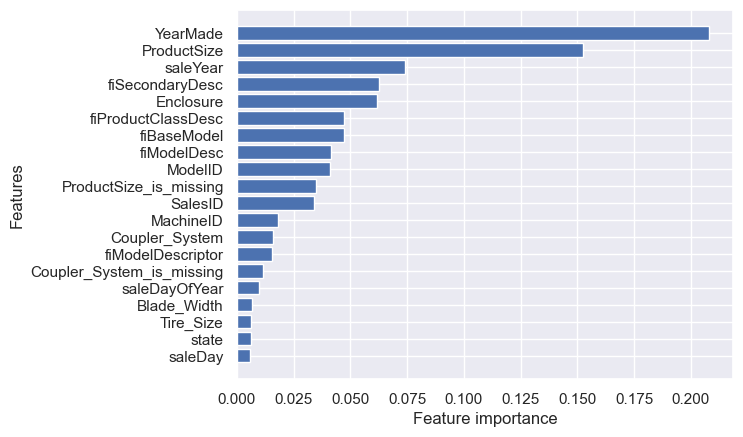

In [104]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [105]:
df["Enclosure"].value_counts()

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

**Pregunta para finalizar:** ¿Por qué podría ser útil conocer la importancia de las características de un modelo de aprendizaje automático entrenado?

**Reto/acción final:** ¿Qué otros modelos de aprendizaje automático podrías probar en nuestro conjunto de datos?  
**Sugerencia:** https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html revisa la sección de regresión de este mapa, o intenta mirar algo como CatBoost.ai o XGBoost.ai.